In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
pd.options.mode.chained_assignment = None

import random
random.seed(68)

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)

from rdkit import Chem
from rdkit.Chem import PandasTools

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
import sys
sys.path.append('../')
from Draw_fig import Draw_plot
from standardization_process import *

In [4]:
def process_stage_1(df,smi_col):
    df[smi_col] = df[smi_col].parallel_apply(smi_to_smi)
    df = df[~df[smi_col].isna()]
    df = smiles_check(df , smi_col)
    df = df[df['Smiles_check'] != False]
    df = remove_salt(df, smi_col)
    metal_index = metal_check(df, 'Smiles_removesalt')
    df = df[~df.index.isin(metal_index)]
    df = smiles_unify(df, 'Smiles_removesalt')
    return df 

# Summary for the raw data

In [7]:
LogD_chembl_raw_data = pd.read_csv('../data/data_mining_results/LogD/LogD_Chembl_data_mining_finished.csv')
LogD_AZ_raw_data = pd.read_csv('../data/raw_data/logd/LogD_AZ_raw_data.csv')

In [9]:
LogD_chembl_raw_data = LogD_chembl_raw_data[~LogD_chembl_raw_data['LogD experiment'].isna()]

In [12]:
LogD_chembl_raw_data['Assay ChEMBL ID'].nunique()

2261

In [13]:
LogD_chembl_raw_data.shape

(25332, 22)

In [14]:
LogD_AZ_raw_data.shape

(4132, 3)

### Chembl

In [18]:
LogD_chembl_raw_data = pd.read_csv('../data/data_mining_results/LogD/LogD_Chembl_data_mining_finished.csv')
LogD_chembl_raw_data.shape

(25963, 22)

In [19]:
LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['Standard Relation'] == "'='"]

In [20]:
LogD_chembl_raw_data

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Document ChEMBL ID,Source Description,Document Journal,Document Year,pH,Analytical Method,Solvent System,Equilibration Technique,Incubation Time,Shaking Condition,LogD experiment
0,CHEMBL205526,CC(C)Cn1c(=O)n(C)c(=O)c2c(SCCCO)c(Cc3cccc4cccc...,LogD,'=',4.80,NaN,CHEMBL869598,"Lipophilicity, LogD of the compound",P,BAO_0000100,small-molecule physicochemical format,CHEMBL1146970,Scientific Literature,Bioorg Med Chem Lett,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,True
1,CHEMBL208330,CC(C)Cn1c(=O)n(C)c(=O)c2c(C(=O)N(C)C)c(Cc3cccc...,LogD,'=',2.90,NaN,CHEMBL869598,"Lipophilicity, LogD of the compound",P,BAO_0000100,small-molecule physicochemical format,CHEMBL1146970,Scientific Literature,Bioorg Med Chem Lett,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,True
2,CHEMBL380947,CC(C)(CO)Nc1nc(SCc2cccc(F)c2F)nc2nc(N)sc12,LogD,'=',3.40,NaN,CHEMBL862385,"Distribution coefficient of the compound, log D",P,BAO_0000100,small-molecule physicochemical format,CHEMBL1149469,Scientific Literature,Bioorg Med Chem Lett,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,True
3,CHEMBL272323,C[C@H](Cc1cccc(CC(=O)NC2C3CC4CC(C3)CC2C4)c1)NC...,LogD,'=',2.10,NaN,CHEMBL946922,"Distribution coefficient, log D of the compound",P,BAO_0000100,small-molecule physicochemical format,CHEMBL1142368,Scientific Literature,Bioorg Med Chem Lett,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,True
4,CHEMBL270199,C[C@H](Cc1cccc(CC(=O)NCC2CCCCC2)c1)NC[C@H](O)c...,LogD,'=',1.50,NaN,CHEMBL946922,"Distribution coefficient, log D of the compound",P,BAO_0000100,small-molecule physicochemical format,CHEMBL1142368,Scientific Literature,Bioorg Med Chem Lett,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25958,CHEMBL5169763,COc1cc(F)ccc1-c1cnc2sc(N3CC[C@@H](O)[C@@H](N)C...,LogD,'=',2.00,NaN,CHEMBL5160047,"Lipophilicity, log D of compound at pH 7.4",P,BAO_0000100,small-molecule physicochemical format,CHEMBL5154768,Scientific Literature,J Med Chem,2022.0,7.4,NaN,NaN,NaN,NaN,NaN,True
25959,CHEMBL4448829,C[C@H](CCC(C)(C)O)[C@H]1CC[C@H]2[C@@H]3CC=C4C[...,LogD,'=',5.00,NaN,CHEMBL5136724,"Lipophilicity, logD of compound in MeOH at 20 ...",P,BAO_0000100,small-molecule physicochemical format,CHEMBL5131569,Scientific Literature,J Med Chem,2022.0,NaN,HPLC,MeOH,NaN,NaN,NaN,True
25960,CHEMBL5205388,C[C@H]1C[C@@H](O)CN(c2ncc(Cl)c(Nc3ccc4c(c3)c3c...,LogD,'=',3.00,NaN,CHEMBL5168566,"Lipophilicity, logD of compound at pH 7.4 by U...",P,BAO_0000100,small-molecule physicochemical format,CHEMBL5154939,Scientific Literature,J Med Chem,2022.0,7.4,UV-vis detection based HPLC,NaN,NaN,NaN,NaN,True
25961,CHEMBL5198667,COc1cccc2[nH]c(C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H...,LogD,'=',4.89,NaN,CHEMBL5155131,"Lipophilicity, log D of the compound at phosph...",P,BAO_0000100,small-molecule physicochemical format,CHEMBL5154637,Scientific Literature,J Med Chem,2022.0,7.4,LC-MS/MS,NaN,NaN,NaN,shake flask,True


In [21]:
LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['LogD experiment'] == True]

In [22]:
LogD_chembl_raw_data = process_stage_1(LogD_chembl_raw_data,'Smiles')
LogD_chembl_raw_data.columns

100%|███████████████████████████████████████| 24612/24612 [00:02<00:00, 9236.50it/s]


SANITIZE_NONE    24612
Name: Smiles_check, dtype: int64


100%|█████████████████████████████████████| 24612/24612 [00:00<00:00, 905623.49it/s]
24612it [00:25, 984.14it/s] 


Metal in Smiles amount: 7


100%|██████████████████████████████████████| 24605/24605 [00:02<00:00, 10827.50it/s]


Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Document ChEMBL ID', 'Source Description', 'Document Journal',
       'Document Year', 'pH', 'Analytical Method', 'Solvent System',
       'Equilibration Technique', 'Incubation Time', 'Shaking Condition',
       'LogD experiment', 'Smiles_check', 'Smiles_removesalt', 'Smiles_unify'],
      dtype='object')

In [23]:
LogD_chembl_raw_data['source'] = LogD_chembl_raw_data['Assay ChEMBL ID']
LogD_chembl_raw_data['value'] = LogD_chembl_raw_data['Standard Value']
LogD_chembl_raw_data = LogD_chembl_raw_data[~LogD_chembl_raw_data['source'].isin(LogD_chembl_raw_data[LogD_chembl_raw_data['value'] > 10]['source'].unique())]

In [24]:
LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['value'] > -5]

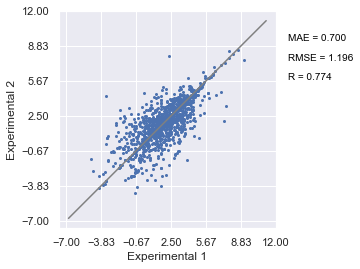

In [25]:
plot_diagram(LogD_chembl_raw_data,['Smiles_unify'],'Standard Value')

# pH

In [26]:
LogD_chembl_raw_data['pH'] = LogD_chembl_raw_data['pH'].fillna(0)

def convert_float(x):
    try:
        return float(x)
    except:
        return 0
LogD_chembl_raw_data['pH'] = LogD_chembl_raw_data['pH'].map(convert_float)

In [27]:
LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['pH'] == 7.4]

# Analytical Method

In [28]:
LogD_chembl_raw_data['Analytical Method'] = LogD_chembl_raw_data['Analytical Method'].fillna('unknown')

In [29]:
LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['Analytical Method'].str.contains('unknown|shake|HPLC')]

In [30]:
LogD_chembl_raw_data['Analytical Method'].value_counts(dropna=False).head(20)

unknown                        7436
shake flask                    2331
HPLC                           1615
shake-flask                     338
RP-HPLC                         236
UV-HPLC                         177
HPLC-MS                         122
HPLC-UV                          88
HPLC-MS/MS                       87
reverse-phase HPLC               86
gradient HPLC                    69
microscale shake flask           61
HPLC-DAD                         54
UV-vis/HPLC                      49
HPLC-LC/MS                       34
shake flask HPLC                 31
LC-MS/MS-based shake flask       30
HPLC-based shake-flask           29
fast gradient HPLC               23
UV-vis detection based HPLC      20
Name: Analytical Method, dtype: int64

In [31]:
LogD_chembl_raw_data['Solvent System'] = LogD_chembl_raw_data['Solvent System'].fillna('unknown')
LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['Solvent System'].str.contains('unknown|water')]
LogD_chembl_raw_data['Solvent System'].value_counts(dropna=False).head(20)

unknown                                            8628
octanol-water                                       776
octanol/water                                       177
1-octanol-water                                     103
hexadecane-water                                     44
octanol/water phosphate buffer                       43
Octanol/water phosphate buffer                       39
Octanol/water                                        38
n-Octanol-water                                      30
1-octanol and water containing phosphate buffer      22
n-octanol-water                                      20
n-octanol/water                                      18
octanol-water in phosphate buffer                    13
water-lipid                                          10
n-octanol/water in HEPES buffer                       9
1-octanol/water                                       8
1-octanol/water in PBS                                8
octanol to water                                

In [32]:
LogD_chembl_raw_data['Equilibration Technique'] = LogD_chembl_raw_data['Equilibration Technique'].fillna('unknown')
# LogD_chembl_raw_data = LogD_chembl_raw_data[LogD_chembl_raw_data['Solvent System'].str.contains('unknown|water')]
LogD_chembl_raw_data['Equilibration Technique'].value_counts(dropna=False).head(20)

unknown    10011
Name: Equilibration Technique, dtype: int64

In [33]:
LogD_chembl_raw_data['Incubation Time'] = LogD_chembl_raw_data['Incubation Time'].fillna('unknown')
LogD_chembl_raw_data = LogD_chembl_raw_data[~LogD_chembl_raw_data['Incubation Time'].str.contains('after 24 hrs')]
LogD_chembl_raw_data['Incubation Time'].value_counts(dropna=False).head(20)

unknown                    9840
30 mins                      64
5 hrs                        26
24 hrs                       21
4 hrs                        14
6 hrs                        14
2 hrs                        13
1 hr                         11
after 4 hrs                   2
after 20 mins                 2
under shaking condition       2
Name: Incubation Time, dtype: int64

In [34]:
LogD_chembl_raw_data['Shaking Condition'] = LogD_chembl_raw_data['Shaking Condition'].fillna('unknown')
# LogD_chembl_raw_data = LogD_chembl_raw_data[~LogD_chembl_raw_data['Shaking Condition'].str.contains('after 24 hrs')]
LogD_chembl_raw_data['Shaking Condition'].value_counts(dropna=False).head(20)

unknown                     9015
shake flask                  645
shake-flask                  255
microscale shake flask        61
miniaturized shake-flask      23
shaking                       10
Name: Shaking Condition, dtype: int64

In [35]:
LogD_chembl_raw_data.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Document ChEMBL ID', 'Source Description', 'Document Journal',
       'Document Year', 'pH', 'Analytical Method', 'Solvent System',
       'Equilibration Technique', 'Incubation Time', 'Shaking Condition',
       'LogD experiment', 'Smiles_check', 'Smiles_removesalt', 'Smiles_unify',
       'source', 'value'],
      dtype='object')

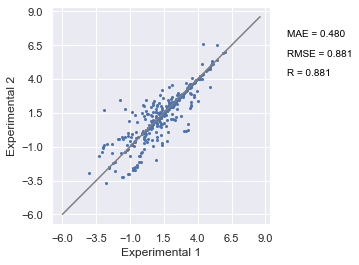

In [36]:
plot_diagram(LogD_chembl_raw_data,['Smiles_unify'],'Standard Value')

In [37]:
LogD_chembl_raw_data = LogD_chembl_raw_data[['Smiles','Standard Value','Assay ChEMBL ID','pH']]

In [38]:
LogD_chembl_raw_data.columns = ['Smiles','value','source','ph']

In [39]:
LogD_chembl_raw_data

,Smiles,value,source,ph
5,C[C@@H]1CN([C@H](c2ccc(CCC(=O)O)cc2)c2cccc(O)c...,2.1,CHEMBL861858,7.4
6,O=C(O)COc1ccc(C(F)(F)F)cc1-c1ccc(Cl)cc1,0.9,CHEMBL1780748,7.4
7,CS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=O)O)c(...,0.5,CHEMBL1780748,7.4
8,CCS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=O)O)c...,0.5,CHEMBL1780748,7.4
9,CCS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2O[C@@H](C)...,0.4,CHEMBL1780748,7.4
...,...,...,...,...
25954,C=CC(=O)N1CCN2c3ncnc4cc(-c5c(C)ccc6[nH]ncc56)c...,3.4,CHEMBL5166129,7.4
25955,COc1cc(C)ccc1-c1cnc2sc(N3CCC(O)(CN)CC3)nn12,1.8,CHEMBL5160047,7.4
25956,COc1nc(C)ccc1-c1cnc2sc(N3CCC(O)(CN)CC3)nn12,1.5,CHEMBL5160047,7.4
25958,COc1cc(F)ccc1-c1cnc2sc(N3CC[C@@H](O)[C@@H](N)C...,2.0,CHEMBL5160047,7.4


### AZ

In [40]:
LogD_AZ_raw_data = pd.read_csv('../data/raw_data/logd/LogD_AZ_raw_data.csv')

In [41]:
LogD_AZ_raw_data.shape

(4132, 3)

In [42]:
LogD_AZ_raw_data.head()

,smiles,AZ_LogD7.4,SLogD
0,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80,2.40434
1,Brc1cnc(NCc2ccccc2)nc1Nc1cc(C2CC2)[nH]n1,4.11,3.71898
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00,3.68020
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59,3.72259
4,C#CCN(C)C(C)Cc1ccccc1,2.16,1.93556


In [43]:
LogD_AZ_raw_data = LogD_AZ_raw_data.loc[:,['smiles','AZ_LogD7.4']]
LogD_AZ_raw_data['source'] = 'CHEMBL 3301361 AZ'
LogD_AZ_raw_data['ph'] = 7.4

In [44]:
LogD_AZ_raw_data.head()

,smiles,AZ_LogD7.4,source,ph
0,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80,CHEMBL 3301361 AZ,7.4
1,Brc1cnc(NCc2ccccc2)nc1Nc1cc(C2CC2)[nH]n1,4.11,CHEMBL 3301361 AZ,7.4
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00,CHEMBL 3301361 AZ,7.4
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59,CHEMBL 3301361 AZ,7.4
4,C#CCN(C)C(C)Cc1ccccc1,2.16,CHEMBL 3301361 AZ,7.4


In [45]:
LogD_AZ_raw_data.columns = ['Smiles','value','source','ph']

In [46]:
LogD_AZ_raw_data.head()

,Smiles,value,source,ph
0,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80,CHEMBL 3301361 AZ,7.4
1,Brc1cnc(NCc2ccccc2)nc1Nc1cc(C2CC2)[nH]n1,4.11,CHEMBL 3301361 AZ,7.4
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00,CHEMBL 3301361 AZ,7.4
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59,CHEMBL 3301361 AZ,7.4
4,C#CCN(C)C(C)Cc1ccccc1,2.16,CHEMBL 3301361 AZ,7.4


In [47]:
LogD_AZ_raw_data.drop_duplicates(inplace=True)

In [48]:
LogD_AZ_raw_data.shape

(4132, 4)

## Concat all data

In [49]:
all_data = pd.concat([LogD_chembl_raw_data,LogD_AZ_raw_data],ignore_index=True)

In [50]:
all_data['source'].nunique(),all_data.shape

(878, (14141, 4))

In [51]:
all_data = process_stage_1(all_data,'Smiles')

100%|██████████████████████████████████████| 14141/14141 [00:01<00:00, 10804.09it/s]


SANITIZE_NONE    14141
Name: Smiles_check, dtype: int64


100%|████████████████████████████████████| 14141/14141 [00:00<00:00, 1224637.70it/s]
14141it [00:14, 965.48it/s] 


Metal in Smiles amount: 0


100%|██████████████████████████████████████| 14141/14141 [00:01<00:00, 11125.89it/s]


In [52]:
all_data = all_data[['Smiles_unify','Smiles','value','source','ph']]

In [53]:
all_data['property'] = 'logd'

# Filter values

In [54]:
all_data = all_data[~all_data['source'].isin(all_data[all_data['value'] > 10]['source'].unique())]

In [55]:
all_data = all_data[all_data['value'] > -5]

In [56]:
all_data = all_data[all_data['ph'] == 7.4]

In [57]:
all_data

,Smiles_unify,Smiles,value,source,ph,property
0,C[C@@H]1CN([C@H](c2ccc(CCC(=O)O)cc2)c2cccc(O)c...,C[C@@H]1CN([C@H](c2ccc(CCC(=O)O)cc2)c2cccc(O)c...,2.10,CHEMBL861858,7.4,logd
1,O=C(O)COc1ccc(C(F)(F)F)cc1-c1ccc(Cl)cc1,O=C(O)COc1ccc(C(F)(F)F)cc1-c1ccc(Cl)cc1,0.90,CHEMBL1780748,7.4,logd
2,CS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=O)O)c(...,CS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=O)O)c(...,0.50,CHEMBL1780748,7.4,logd
3,CCS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=O)O)c...,CCS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=O)O)c...,0.50,CHEMBL1780748,7.4,logd
4,CCS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2O[C@@H](C)...,CCS(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2O[C@@H](C)...,0.40,CHEMBL1780748,7.4,logd
...,...,...,...,...,...,...
14136,c1cnc2cccnc2c1,c1cnc2cccnc2c1,0.89,CHEMBL 3301361 AZ,7.4,logd
14137,c1cncc(-c2ccc(-c3nnc(C4CN5CCC4CC5)o3)o2)c1,c1cncc(-c2ccc(-c3nnc(C4CN5CCC4CC5)o3)o2)c1,1.20,CHEMBL 3301361 AZ,7.4,logd
14138,c1cncc(Nc2ncnc3ccccc23)c1,c1cncc(Nc2ncnc3ccccc23)c1,1.57,CHEMBL 3301361 AZ,7.4,logd
14139,c1csc(Cn2nnnc2CN2CCN(c3nc4ccccc4s3)CC2)c1,c1csc(Cn2nnnc2CN2CCN(c3nc4ccccc4s3)CC2)c1,3.65,CHEMBL 3301361 AZ,7.4,logd


In [58]:
all_data.to_csv('../data/data_processing_result/logd_preprocessing_finished.csv',index=False)